In [131]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [107]:
#read the data
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [108]:
#Understand the data
def check_df(dataframe,head=5, tail = 5):
    print("Shape")
    print(dataframe.shape)
    print("Types")
    print(dataframe.dtypes)
    print("Head")
    print(dataframe.head(head))
    print("Tail")
    print(dataframe.tail(tail))
    print("NA")
    print(dataframe.isnull().sum())
    print("Quantiles")
    print(dataframe.quantile([0,0.5,0.50,0.95,0.99,1]).T)


In [109]:
check_df(df)

Shape
(2416, 7)
Types
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Head
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
Tail
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000

In [110]:
#Data Visualization
tesla_data=df[["Date","Close"]]
tesla_data["Date"]=pd.to_datetime(tesla_data["Date"])
tesla_data.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [111]:
print("Min. Date:",tesla_data["Date"].min())
print("Max. Date:",tesla_data["Date"].max())

Min. Date: 2010-06-29 00:00:00
Max. Date: 2020-02-03 00:00:00


In [112]:
tesla_data.index=tesla_data["Date"]

In [113]:
tesla_data

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001
...,...,...
2020-01-28,2020-01-28,566.900024
2020-01-29,2020-01-29,580.989990
2020-01-30,2020-01-30,640.809998


In [114]:
tesla_data.drop("Date",axis=1,inplace=True)

In [115]:
tesla_data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


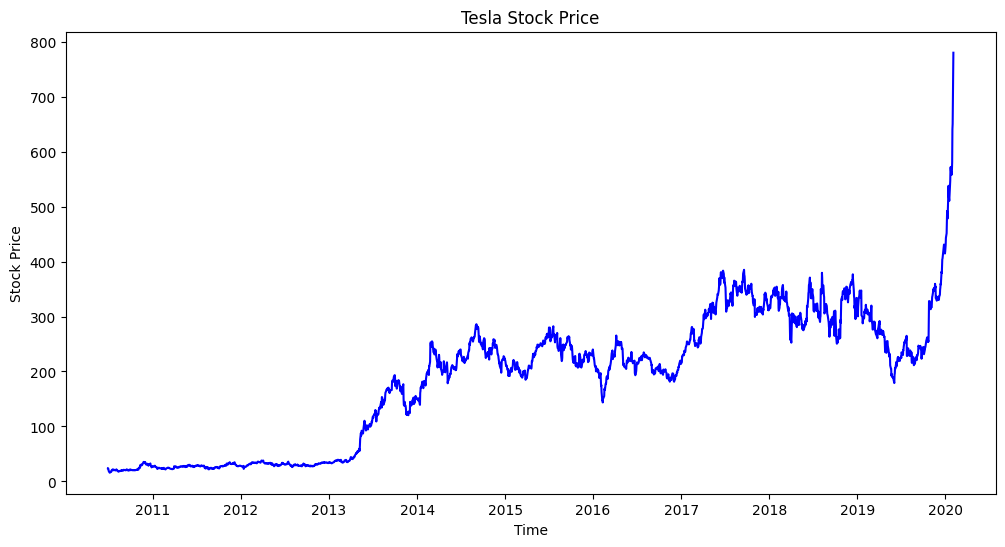

In [116]:
plt.figure(figsize=(12,6))
plt.plot(tesla_data["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

In [117]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [118]:
#Target
y = df["Close"]
# Features
x = df.drop(["Date","Close","Adj Close"],axis=1)

In [119]:
# Spliting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [120]:
y_train.shape

(1932,)

In [121]:
scaler = MinMaxScaler()
model = LinearRegression()

In [122]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [123]:
#Train the model
model.fit(x_train,y_train)

LinearRegression()

In [124]:
#Predict
y_pred = model.predict(x_test)

In [125]:
#Score and coefficients
score = model.score(x_test,y_test)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

In [126]:
print('Score',score,
      'MSE',mse,
      'R2', r2)

Score 0.9997117604197426 MSE 4.379434894426476 R2 0.9997117604197426


In [127]:
# Getting the intercept and Coefficients
print("Intercept: ",model.intercept_)
print("Coefficients: ")
for _ in model.coef_:
    print(_)

Intercept:  15.70401233009568
Coefficients: 
-424.1340722859228
709.5756425557494
475.1397664021022
-1.6592264887922852


In [128]:
comparison = pd.DataFrame({'Predicted Values':y_pred,'Actual Values':y_test})

In [129]:
comparison.head(15)

,Predicted Values,Actual Values
410,31.442062,31.490000
199,24.529889,24.650000
1670,278.905101,279.760010
1934,330.673522,328.200012
1036,262.081422,259.320007
2384,381.907290,378.989990
254,29.095709,29.129999
1480,212.174219,208.289993
1541,225.061691,224.910004
2097,307.804202,314.859985


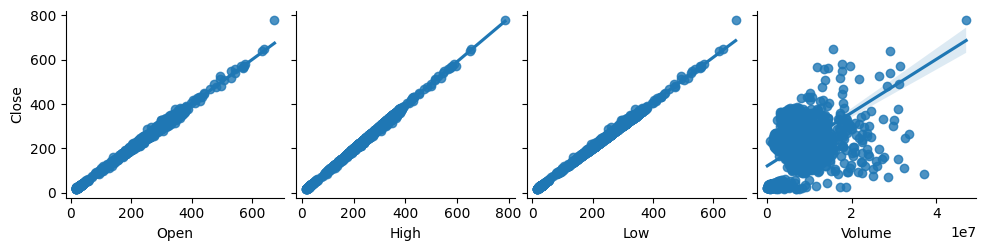

In [130]:
#Regression plot
sns.pairplot(df , x_vars = ['Open','High','Low','Volume'] , y_vars =  ['Close'] , kind = 'reg')